In [80]:
# Import tutto quanto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [81]:
# LOADING DATA

df=pd.read_csv("ICU_Challenge_Dataset.csv", sep=",")
df_description = df.describe()
columns = df.columns


In [82]:
# MISSING DATA - da esplorare
# print(df[df.columns[df.isna().any()]])
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)

                         column_name  percent_missing
recordid                    recordid         0.000000
SAPS-I                        SAPS-I         0.000000
SOFA                            SOFA         0.000000
In-hospital_death  In-hospital_death         0.000000
Age                              Age         0.000000
...                              ...              ...
TroponinT_first      TroponinT_first        77.766667
Cholesterol_last    Cholesterol_last        92.133333
Cholesterol_first  Cholesterol_first        92.133333
TroponinI_last        TroponinI_last        95.250000
TroponinI_first      TroponinI_first        95.250000

[121 rows x 2 columns]


In [83]:
df_col_keep = missing_value_df[missing_value_df['percent_missing']<50]
df_col = df_col_keep['column_name']

df=df[df_col]
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,CCU,CSRU,SICU,Gender,BUN_first,...,Weight_first,FiO2_last,FiO2_first,MechVentDuration,MechVentStartTime,UrineOutputSum,MechVentLast8Hour,Lactate_first,Lactate_last,Height
0,132539,6,1,0,54.0,0,0,1,0.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,0,1,0,1.0,16.0,...,80.6,0.40,1.0,360.0,71.0,5.0,0.0,NaN,NaN,175.3
2,132541,21,11,0,44.0,0,0,0,0.0,8.0,...,56.7,0.40,1.0,2160.0,617.0,14.0,1.0,1.3,0.9,NaN
3,132543,7,1,0,68.0,0,0,0,1.0,23.0,...,84.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.3
4,132545,17,2,0,88.0,0,0,0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,0,0,1,1.0,11.0,...,NaN,0.40,0.6,2440.0,238.0,17.0,1.0,NaN,NaN,NaN
5996,151383,13,2,0,90.0,1,0,0,0.0,20.0,...,72.9,1.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,157.5
5997,149623,12,9,0,72.0,1,0,0,0.0,62.0,...,NaN,0.35,0.5,1200.0,188.0,10.0,0.0,1.4,1.4,NaN
5998,145366,18,11,1,52.0,0,0,0,1.0,16.0,...,95.9,0.50,1.0,2760.0,100.0,27.0,1.0,9.9,8.2,182.9


In [84]:
print(np.unique(df.dtypes))

int_var = list(df.columns[df.dtypes == np.int64])
float_var = list(df.columns[df.dtypes == np.float64])

cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <=3: #conta anche i Nan come valori
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]

[dtype('int64') dtype('float64')]


In [85]:
#normal test and for similarity
#different
df = df.drop(['BUN_first', 'Creatinine_first', 'Na_first', 'Weight_first'], axis=1)
df_copia = df
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,CCU,CSRU,SICU,Gender,Creatinine_last,...,Weight_last,FiO2_last,FiO2_first,MechVentDuration,MechVentStartTime,UrineOutputSum,MechVentLast8Hour,Lactate_first,Lactate_last,Height
0,132539,6,1,0,54.0,0,0,1,0.0,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,0,1,0,1.0,1.3,...,81.6,0.40,1.0,360.0,71.0,5.0,0.0,NaN,NaN,175.3
2,132541,21,11,0,44.0,0,0,0,0.0,0.3,...,56.7,0.40,1.0,2160.0,617.0,14.0,1.0,1.3,0.9,NaN
3,132543,7,1,0,68.0,0,0,0,1.0,0.7,...,84.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.3
4,132545,17,2,0,88.0,0,0,0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,0,0,1,1.0,0.6,...,NaN,0.40,0.6,2440.0,238.0,17.0,1.0,NaN,NaN,NaN
5996,151383,13,2,0,90.0,1,0,0,0.0,0.7,...,68.5,1.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,157.5
5997,149623,12,9,0,72.0,1,0,0,0.0,2.8,...,NaN,0.35,0.5,1200.0,188.0,10.0,0.0,1.4,1.4,NaN
5998,145366,18,11,1,52.0,0,0,0,1.0,1.0,...,96.2,0.50,1.0,2760.0,100.0,27.0,1.0,9.9,8.2,182.9


In [86]:
df['HCT_diff'] = df['HCT_first'] - df['HCT_last']
df['HR_diff'] = df['HR_first'] - df['HR_last']
df['Temp_diff'] = df['Temp_first'] - df['Temp_last']
df['GCS_diff'] = df['GCS_first'] - df['GCS_last']
df['Platelets_diff'] = df['Platelets_first'] - df['Platelets_last']
df['HCO3_diff'] = df['HCO3_first'] - df['HCO3_last']
df['K_diff'] = df['K_first'] - df['K_last']
df['WBC_diff'] = df['WBC_first'] - df['WBC_last']
df['Mg_diff'] = df['Mg_first'] - df['Mg_last']
df['Glucose_diff'] = df['Glucose_first'] - df['Glucose_last']
df['NISysABP_diff'] = df['NISysABP_first'] - df['NISysABP_last']
df['NIDiasABP_diff'] = df['NIDiasABP_first'] - df['NIDiasABP_last']
df['pH_diff'] = df['pH_first'] - df['pH_last']
df['PaO2_diff'] = df['PaO2_first'] - df['PaO2_last']
df['PaCO2_diff'] = df['PaCO2_first'] - df['PaCO2_last']
df['MAP_diff'] = df['MAP_first'] - df['MAP_last']
df['SysABP_diff'] = df['SysABP_first'] - df['SysABP_last']
df['DiasABP_diff'] = df['DiasABP_first'] - df['DiasABP_last']
df['FiO2_diff'] = df['FiO2_first'] - df['FiO2_last']
df['Lactate_diff'] = df['Lactate_first'] - df['Lactate_last']

df = df.drop(['HCT_first', 'HCT_last', 'HR_first', 'HR_last', 'Temp_first', 'Temp_last', 'GCS_first', 'GCS_last', 'Platelets_first', 'Platelets_last', 'HCO3_first', 'HCO3_last', 'K_first', 'K_last', 'WBC_first', 'WBC_last', 'Mg_first', 'Mg_last', 'Glucose_first', 'Glucose_last', 'NISysABP_first', 'NISysABP_last', 'NIDiasABP_first', 'NIDiasABP_last', 'pH_first', 'pH_last', 'PaO2_first', 'PaO2_last', 'PaCO2_first', 'PaCO2_last',  'MAP_first', 'MAP_last', 'SysABP_first', 'SysABP_last', 'DiasABP_first', 'DiasABP_last', 'FiO2_first', 'FiO2_last', 'Lactate_first', 'Lactate_last' ], axis=1)
df

,recordid,SAPS-I,SOFA,In-hospital_death,Age,CCU,CSRU,SICU,Gender,Creatinine_last,...,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff,MAP_diff,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff
0,132539,6,1,0,54.0,0,0,1,0.0,0.7,...,19.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,0,76.0,0,1,0,1.0,1.3,...,-35.0,-11.0,0.08,204.0,-12.0,10.0,2.0,16.0,0.60,NaN
2,132541,21,11,0,44.0,0,0,0,0.0,0.3,...,-8.0,0.0,0.04,-108.0,0.0,15.0,22.0,11.0,0.60,0.4
3,132543,7,1,0,68.0,0,0,0,1.0,0.7,...,0.0,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,0,88.0,0,0,0,0.0,1.0,...,9.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,1,52.0,0,0,1,1.0,0.6,...,NaN,NaN,-0.03,249.0,5.0,12.0,-2.0,10.0,0.20,NaN
5996,151383,13,2,0,90.0,1,0,0,0.0,0.7,...,19.0,5.0,NaN,NaN,NaN,3.0,4.0,1.0,0.00,NaN
5997,149623,12,9,0,72.0,1,0,0,0.0,2.8,...,-4.0,12.0,-0.12,-43.0,24.0,35.0,23.0,5.0,0.15,0.0
5998,145366,18,11,1,52.0,0,0,0,1.0,1.0,...,41.0,30.0,-0.06,8.0,-9.0,-14.0,0.0,6.0,0.50,1.7


In [87]:
def plot_correlation_heatmap(df):
    plt.figure(figsize=(20,20))
    corr = df.corr()
    ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True, annot=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,

    );

In [88]:
cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <=3: #conta anche i Nan come valori
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]

In [89]:
numerical_df

,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,HR_median,HR_highest,HR_lowest,Temp_median,...,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff,MAP_diff,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff
0,132539,6,1,54.0,0.7,8.0,73.0,86.0,58.0,37.70,...,19.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,76.0,1.3,21.0,80.0,90.0,65.0,37.45,...,-35.0,-11.0,0.08,204.0,-12.0,10.0,2.0,16.0,0.60,NaN
2,132541,21,11,44.0,0.3,3.0,85.5,113.0,57.0,37.85,...,-8.0,0.0,0.04,-108.0,0.0,15.0,22.0,11.0,0.60,0.4
3,132543,7,1,68.0,0.7,10.0,74.0,88.0,57.0,36.40,...,0.0,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,88.0,1.0,25.0,73.0,94.0,65.0,37.00,...,9.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,101.0,132.0,59.0,36.70,...,NaN,NaN,-0.03,249.0,5.0,12.0,-2.0,10.0,0.20,NaN
5996,151383,13,2,90.0,0.7,23.0,108.0,124.0,84.0,36.75,...,19.0,5.0,NaN,NaN,NaN,3.0,4.0,1.0,0.00,NaN
5997,149623,12,9,72.0,2.8,67.0,100.0,123.0,79.0,37.05,...,-4.0,12.0,-0.12,-43.0,24.0,35.0,23.0,5.0,0.15,0.0
5998,145366,18,11,52.0,1.0,25.0,108.0,143.0,68.0,36.90,...,41.0,30.0,-0.06,8.0,-9.0,-14.0,0.0,6.0,0.50,1.7


In [90]:
numerical_df
to_drop = []

for x in list(numerical_df.columns):
    if 'highest' in x:
        to_drop.append(x)
    if 'median' in x:
        to_drop.append(x)
    if 'lowest' in x:
        to_drop.append(x)
to_drop

['HR_median',
 'HR_highest',
 'HR_lowest',
 'Temp_median',
 'Temp_highest',
 'GCS_highest',
 'Temp_lowest',
 'GCS_lowest',
 'GCS_median',
 'Glucose_lowest',
 'Glucose_median',
 'Glucose_highest',
 'NISysABP_median',
 'NISysABP_highest',
 'NISysABP_lowest',
 'NIDiasABP_lowest',
 'NIMAP_lowest',
 'NIMAP_median',
 'NIDiasABP_median',
 'NIMAP_highest',
 'NIDiasABP_highest',
 'MAP_lowest',
 'MAP_highest',
 'MAP_median',
 'SysABP_median',
 'SysABP_highest',
 'SysABP_lowest',
 'DiasABP_lowest',
 'DiasABP_highest',
 'DiasABP_median']

In [91]:
numerical_df = numerical_df.drop(to_drop, axis=1)
numerical_df

,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,Na_last,Weight,NIMAP_first,NIMAP_last,...,NISysABP_diff,NIDiasABP_diff,pH_diff,PaO2_diff,PaCO2_diff,MAP_diff,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff
0,132539,6,1,54.0,0.7,8.0,136.0,NaN,92.33,79.33,...,19.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,132540,16,8,76.0,1.3,21.0,135.0,76.0,49.33,68.33,...,-35.0,-11.0,0.08,204.0,-12.0,10.0,2.0,16.0,0.60,NaN
2,132541,21,11,44.0,0.3,3.0,138.0,56.7,100.30,103.00,...,-8.0,0.0,0.04,-108.0,0.0,15.0,22.0,11.0,0.60,0.4
3,132543,7,1,68.0,0.7,10.0,137.0,84.6,86.67,98.67,...,0.0,-18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,132545,17,2,88.0,1.0,25.0,139.0,NaN,75.33,73.00,...,9.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,140.0,80.0,NaN,NaN,...,NaN,NaN,-0.03,249.0,5.0,12.0,-2.0,10.0,0.20,NaN
5996,151383,13,2,90.0,0.7,23.0,129.0,72.0,98.67,89.00,...,19.0,5.0,NaN,NaN,NaN,3.0,4.0,1.0,0.00,NaN
5997,149623,12,9,72.0,2.8,67.0,144.0,185.0,90.33,83.67,...,-4.0,12.0,-0.12,-43.0,24.0,35.0,23.0,5.0,0.15,0.0
5998,145366,18,11,52.0,1.0,25.0,134.0,95.9,92.00,58.33,...,41.0,30.0,-0.06,8.0,-9.0,-14.0,0.0,6.0,0.50,1.7


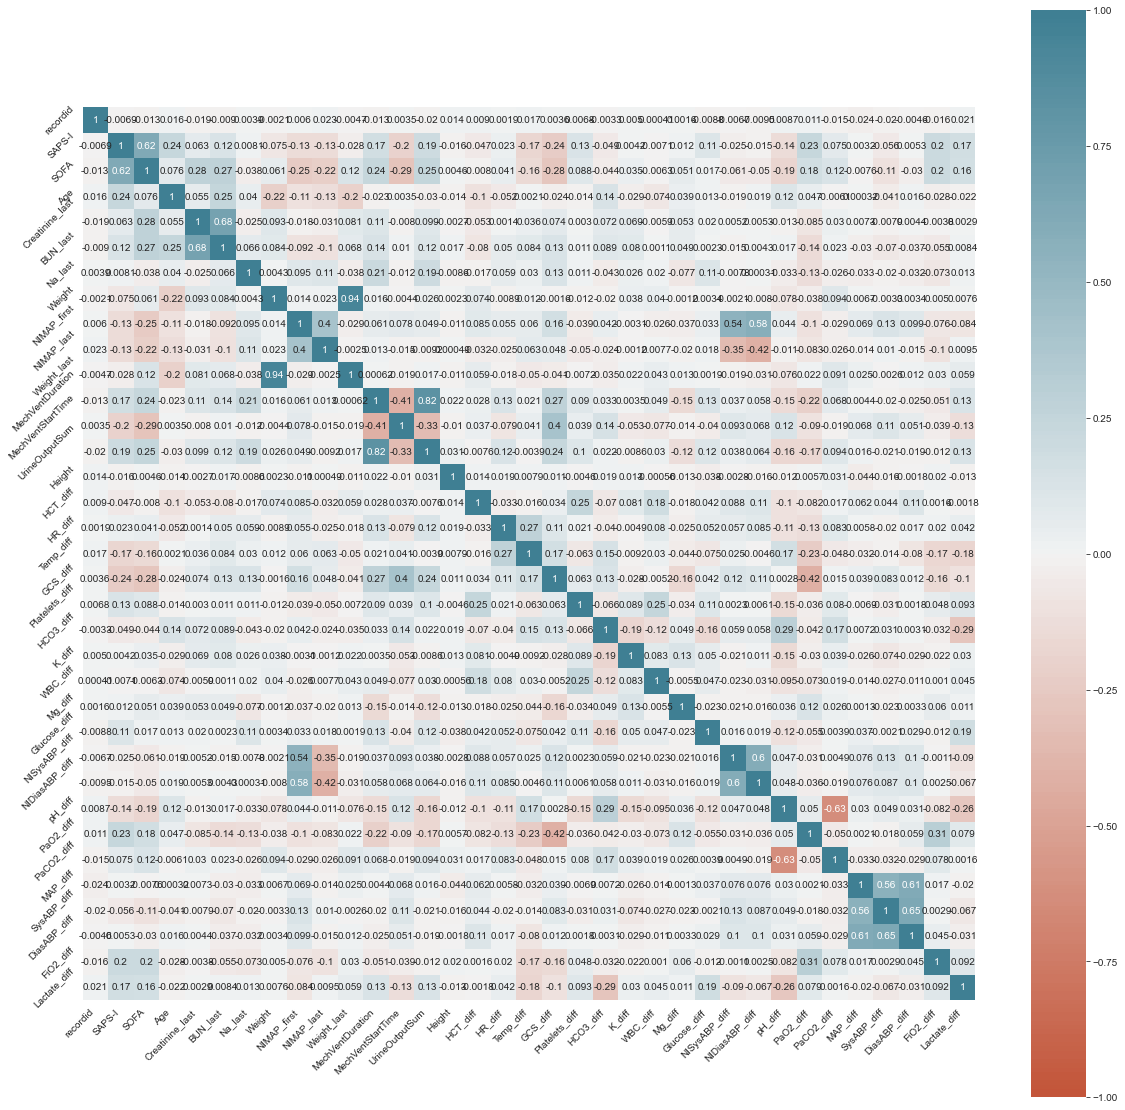

In [92]:
numerical_df
plot_correlation_heatmap(numerical_df)

In [93]:
frames=[numerical_df, categorical_df]
df_3 = pd.concat(frames, axis=1)
df_3

,recordid,SAPS-I,SOFA,Age,Creatinine_last,BUN_last,Na_last,Weight,NIMAP_first,NIMAP_last,...,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff,In-hospital_death,CCU,CSRU,SICU,Gender,MechVentLast8Hour
0,132539,6,1,54.0,0.7,8.0,136.0,NaN,92.33,79.33,...,NaN,NaN,NaN,NaN,0,0,0,1,0.0,NaN
1,132540,16,8,76.0,1.3,21.0,135.0,76.0,49.33,68.33,...,2.0,16.0,0.60,NaN,0,0,1,0,1.0,0.0
2,132541,21,11,44.0,0.3,3.0,138.0,56.7,100.30,103.00,...,22.0,11.0,0.60,0.4,0,0,0,0,0.0,1.0
3,132543,7,1,68.0,0.7,10.0,137.0,84.6,86.67,98.67,...,NaN,NaN,NaN,NaN,0,0,0,0,1.0,NaN
4,132545,17,2,88.0,1.0,25.0,139.0,NaN,75.33,73.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,6,52.0,0.6,9.0,140.0,80.0,NaN,NaN,...,-2.0,10.0,0.20,NaN,1,0,0,1,1.0,1.0
5996,151383,13,2,90.0,0.7,23.0,129.0,72.0,98.67,89.00,...,4.0,1.0,0.00,NaN,0,1,0,0,0.0,NaN
5997,149623,12,9,72.0,2.8,67.0,144.0,185.0,90.33,83.67,...,23.0,5.0,0.15,0.0,0,1,0,0,0.0,0.0
5998,145366,18,11,52.0,1.0,25.0,134.0,95.9,92.00,58.33,...,0.0,6.0,0.50,1.7,1,0,0,0,1.0,1.0


array([[<AxesSubplot:title={'center':'recordid'}>,
        <AxesSubplot:title={'center':'SAPS-I'}>,
        <AxesSubplot:title={'center':'SOFA'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Creatinine_last'}>,
        <AxesSubplot:title={'center':'BUN_last'}>],
       [<AxesSubplot:title={'center':'Na_last'}>,
        <AxesSubplot:title={'center':'Weight'}>,
        <AxesSubplot:title={'center':'NIMAP_first'}>,
        <AxesSubplot:title={'center':'NIMAP_last'}>,
        <AxesSubplot:title={'center':'Weight_last'}>,
        <AxesSubplot:title={'center':'MechVentDuration'}>],
       [<AxesSubplot:title={'center':'MechVentStartTime'}>,
        <AxesSubplot:title={'center':'UrineOutputSum'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'HCT_diff'}>,
        <AxesSubplot:title={'center':'HR_diff'}>,
        <AxesSubplot:title={'center':'Temp_diff'}>],
       [<AxesSubplot:title={'center':'GCS_diff'}>,
      

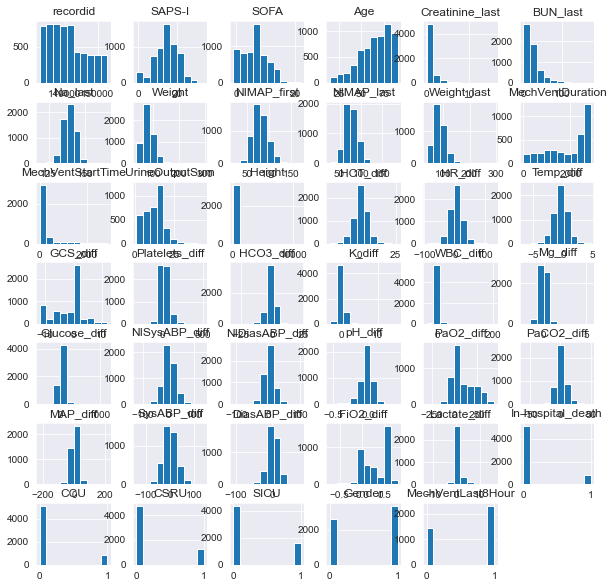

In [94]:
df_3.hist(figsize=(10,10))

C:\Users\Alice Donati\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

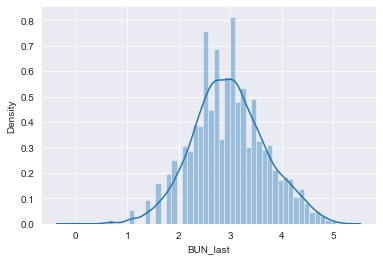

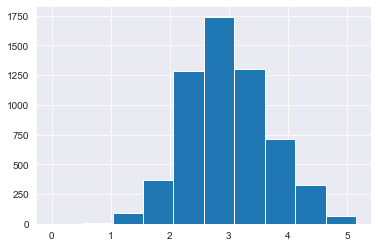

In [95]:
import matplotlib.pyplot as plt
bun_log= np.log(numerical_df['BUN_last'])
sns.distplot(bun_log)
fig = plt.figure()
bun_log.hist()

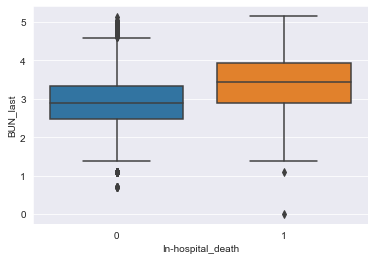

In [96]:
import seaborn as sns

sns.boxplot(x=categorical_df['In-hospital_death'], y=bun_log)
plt.show()

<AxesSubplot:xlabel='In-hospital_death', ylabel='BUN_last'>

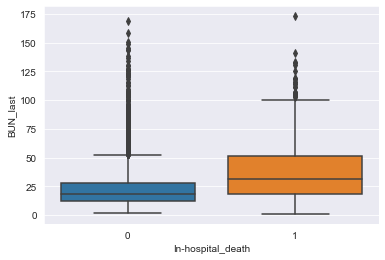

In [97]:
plt.show()
sns.boxplot(x=categorical_df['In-hospital_death'], y=numerical_df['BUN_last'])

In [98]:
import matplotlib.pyplot as plt
crea_log = np.log(numerical_df['Creatinine_last'])

df_3=df_3.drop(['Creatinine_last', 'BUN_last'], axis=1)
df_3.insert(2, 'Creatinine_last_log', crea_log)
df_3.insert(3, 'BUN_last_log', bun_log)
df_3

,recordid,SAPS-I,Creatinine_last_log,BUN_last_log,SOFA,Age,Na_last,Weight,NIMAP_first,NIMAP_last,...,SysABP_diff,DiasABP_diff,FiO2_diff,Lactate_diff,In-hospital_death,CCU,CSRU,SICU,Gender,MechVentLast8Hour
0,132539,6,-0.356675,2.079442,1,54.0,136.0,NaN,92.33,79.33,...,NaN,NaN,NaN,NaN,0,0,0,1,0.0,NaN
1,132540,16,0.262364,3.044522,8,76.0,135.0,76.0,49.33,68.33,...,2.0,16.0,0.60,NaN,0,0,1,0,1.0,0.0
2,132541,21,-1.203973,1.098612,11,44.0,138.0,56.7,100.30,103.00,...,22.0,11.0,0.60,0.4,0,0,0,0,0.0,1.0
3,132543,7,-0.356675,2.302585,1,68.0,137.0,84.6,86.67,98.67,...,NaN,NaN,NaN,NaN,0,0,0,0,1.0,NaN
4,132545,17,0.000000,3.218876,2,88.0,139.0,NaN,75.33,73.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,151939,19,-0.510826,2.197225,6,52.0,140.0,80.0,NaN,NaN,...,-2.0,10.0,0.20,NaN,1,0,0,1,1.0,1.0
5996,151383,13,-0.356675,3.135494,2,90.0,129.0,72.0,98.67,89.00,...,4.0,1.0,0.00,NaN,0,1,0,0,0.0,NaN
5997,149623,12,1.029619,4.204693,9,72.0,144.0,185.0,90.33,83.67,...,23.0,5.0,0.15,0.0,0,1,0,0,0.0,0.0
5998,145366,18,0.000000,3.218876,11,52.0,134.0,95.9,92.00,58.33,...,0.0,6.0,0.50,1.7,1,0,0,0,1.0,1.0


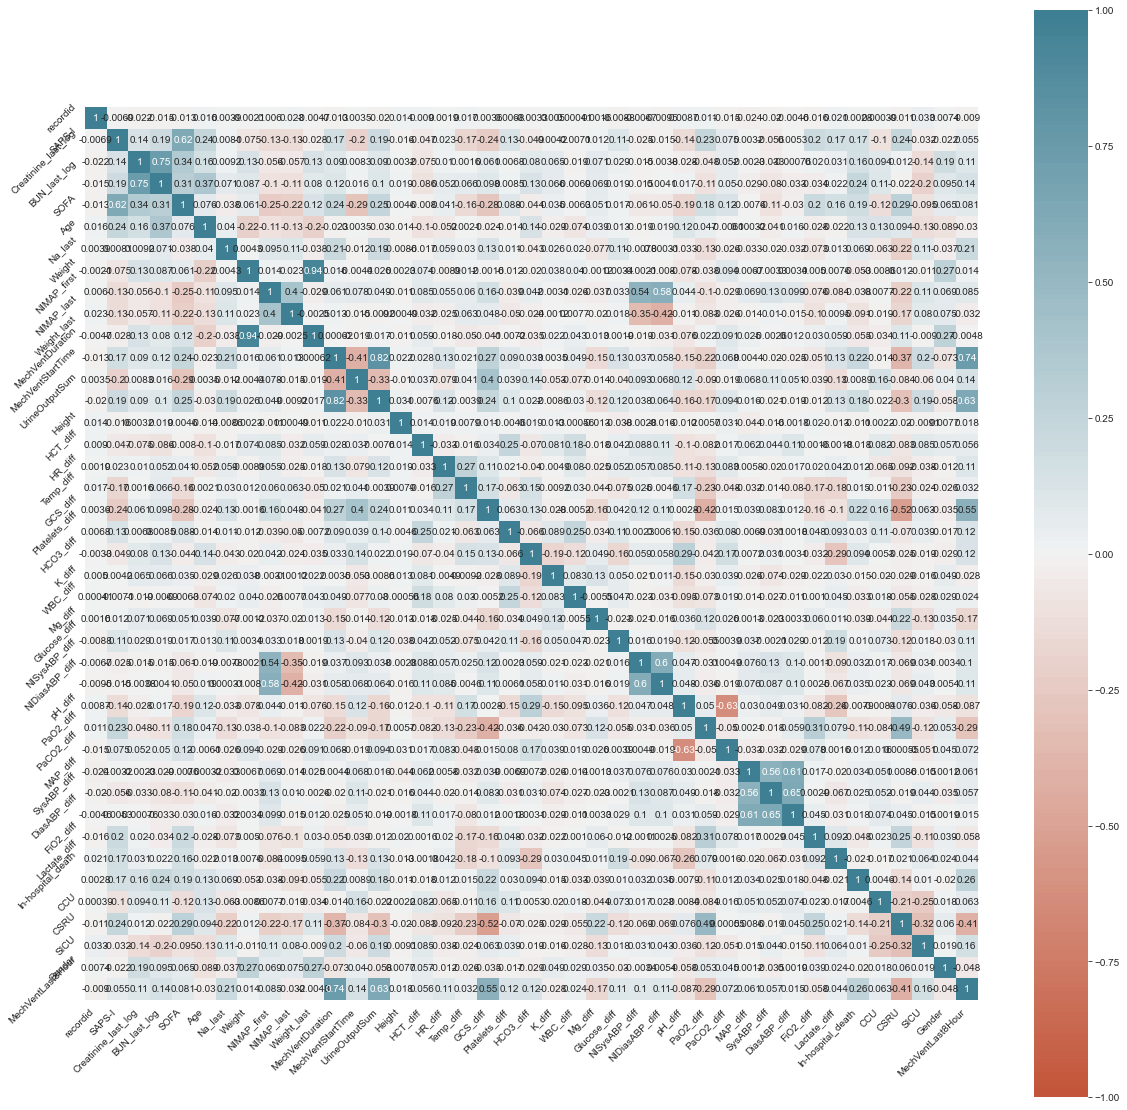

In [99]:
plot_correlation_heatmap(df_3)

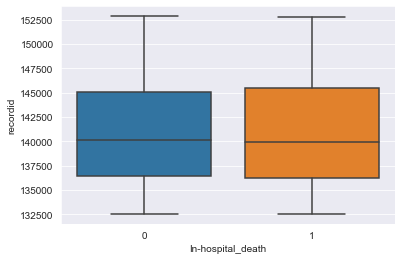

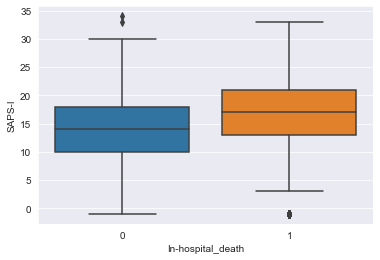

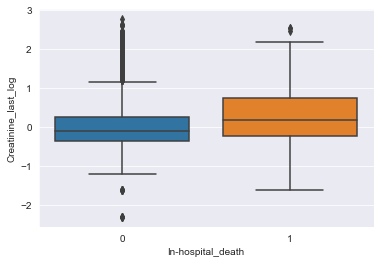

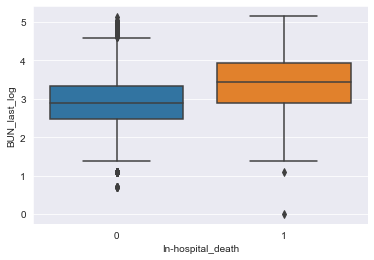

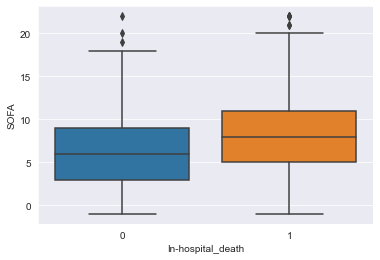

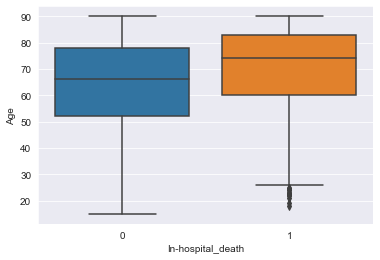

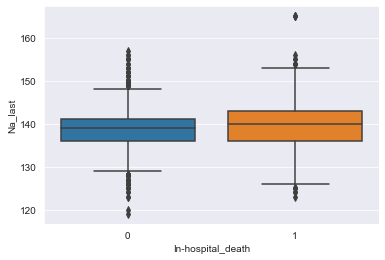

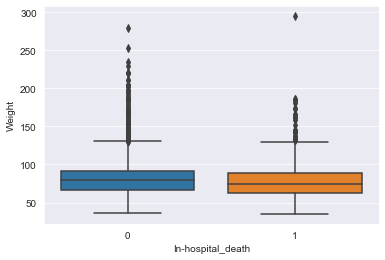

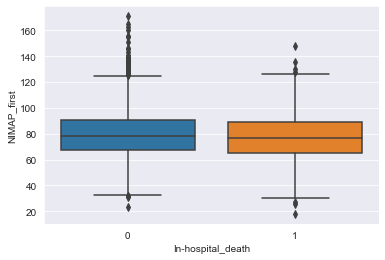

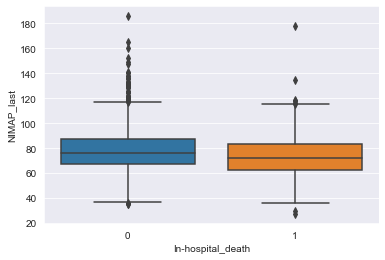

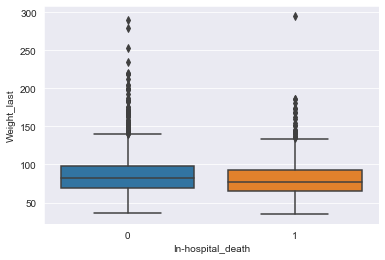

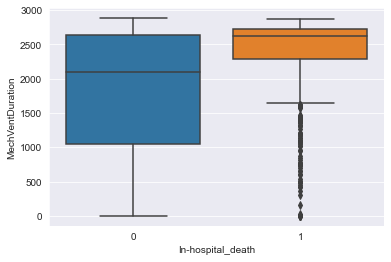

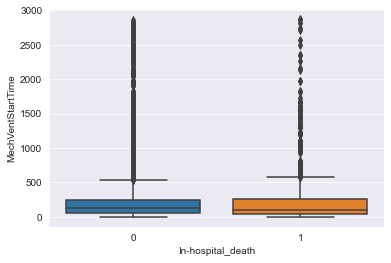

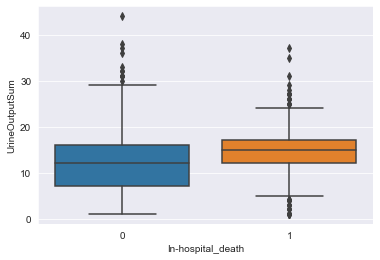

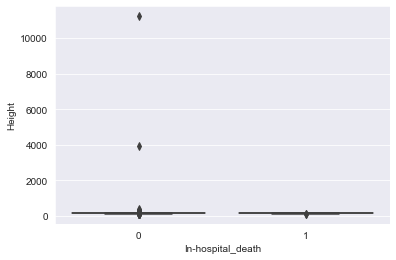

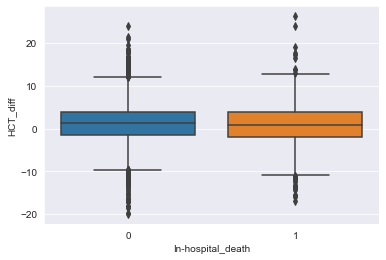

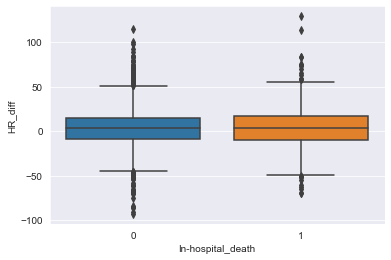

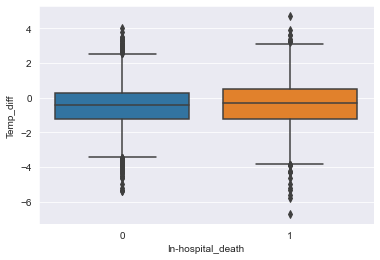

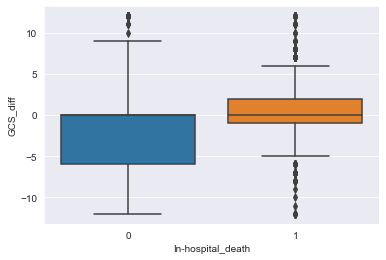

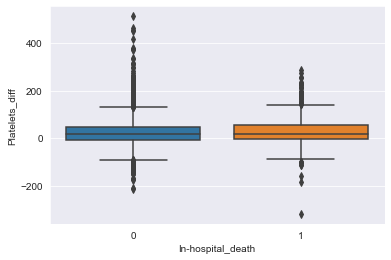

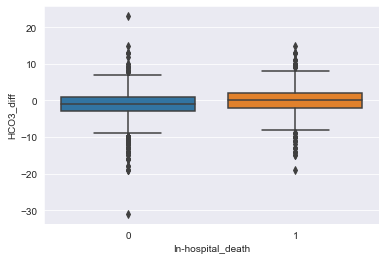

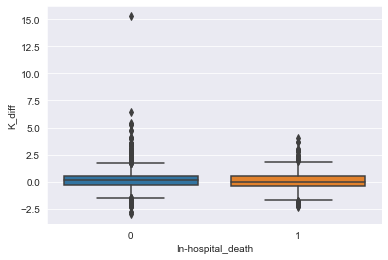

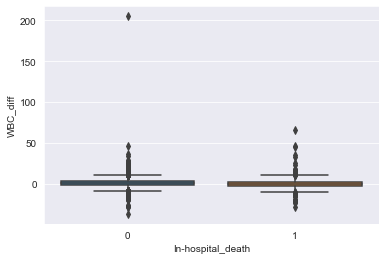

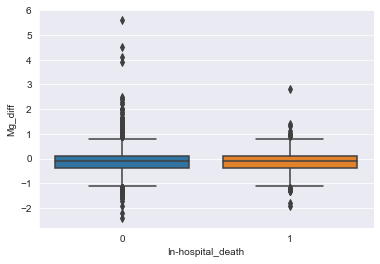

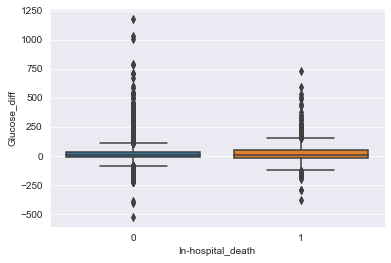

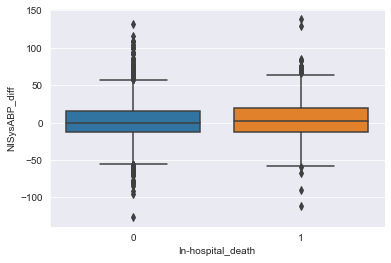

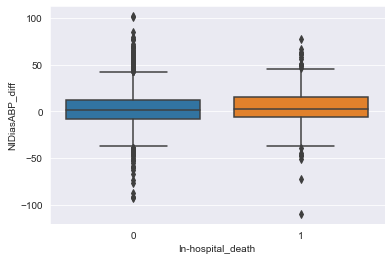

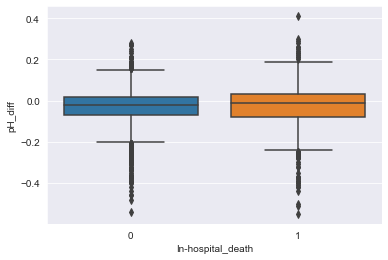

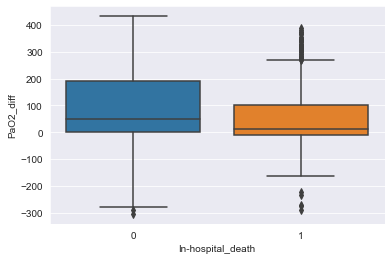

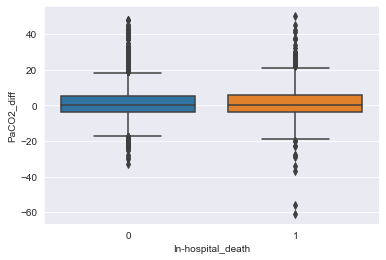

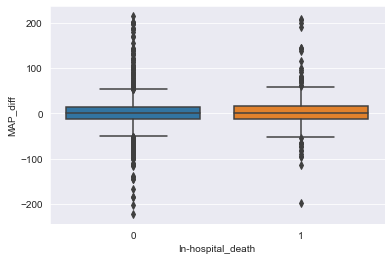

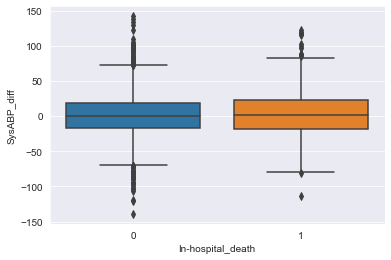

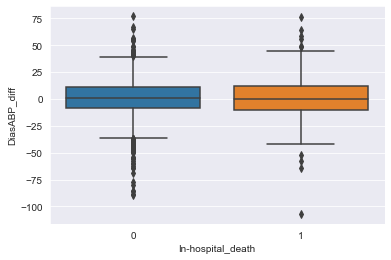

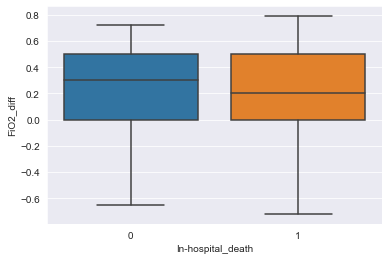

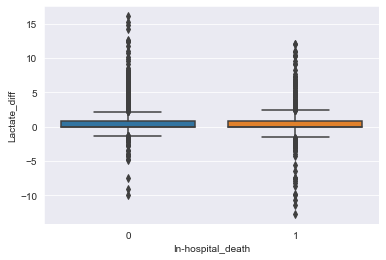

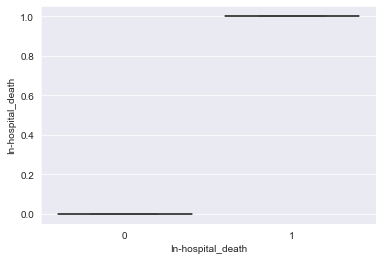

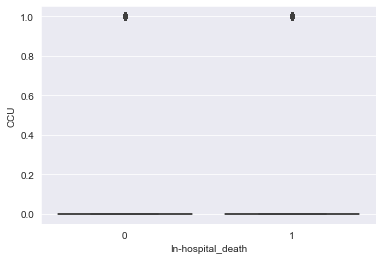

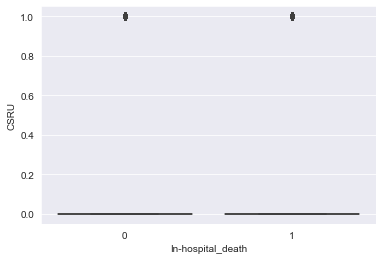

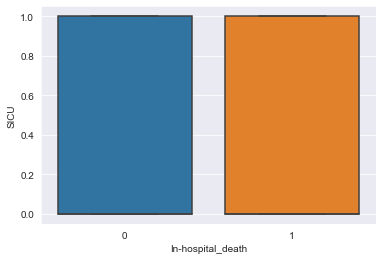

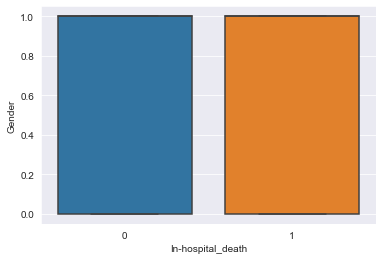

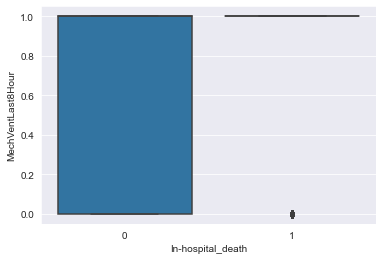

In [100]:
import seaborn as sns

for col in list(df_3):
    sns.boxplot(x=categorical_df['In-hospital_death'], y=df_3[col])
    plt.show()

In [101]:
#LAVORARE UN PO' SU OUTLIER(?)